In [53]:
from dask.distributed import Client, LocalCluster
import dask.dataframe as dd

In [49]:
cluster = LocalCluster()
client = Client(cluster)
file_path = '/Users/cagimer/Desktop/Projects/read_data_with_dask/input_file.csv'

/Users/cagimer/.pyenv/versions/3.8.12/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54169 instead
  warnings.warn(


In [50]:
cols = ['Country', 'Date', 'Worker']
ddf = dd.read_csv(file_path,blocksize='5 KB', names=cols, dtype={'Country': str, 'Date': str, 'Worker': int})

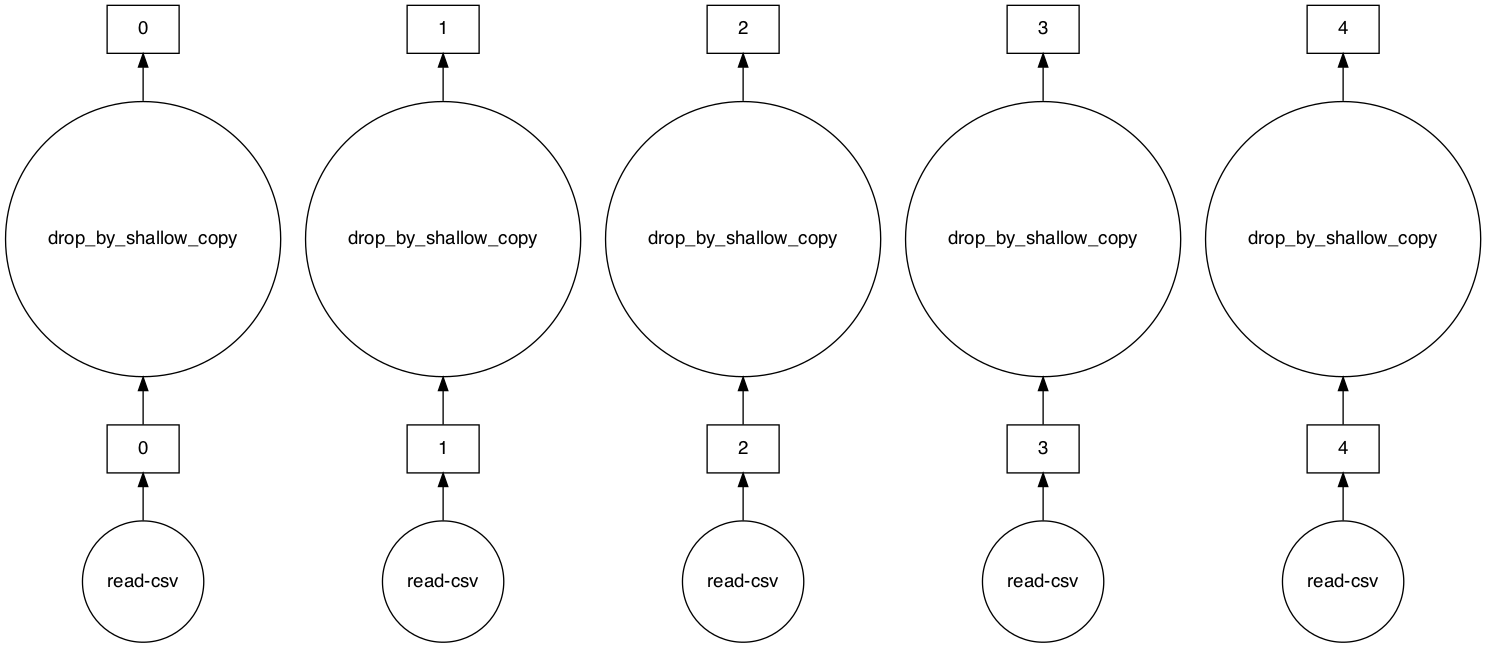

In [51]:
ddf = ddf.drop('Date', axis=1)
ddf.visualize()

In [52]:
output_data = ddf.groupby(['Country']).sum().compute()

In [42]:
output_data.to_csv('/Users/cagimer/Desktop/Projects/read_data_with_dask/output_file.csv')